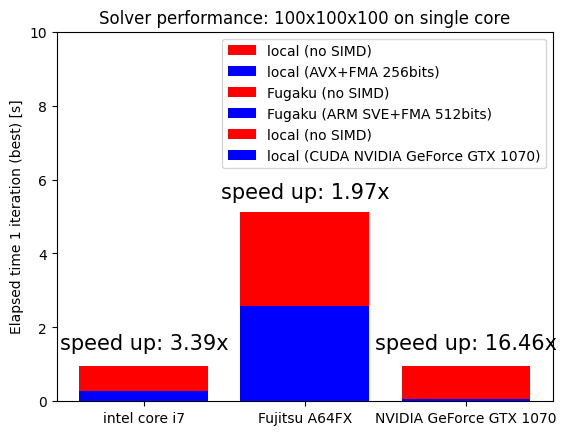

In [2]:
# notebook for plotting the effect of SIMD on the solver performance

import numpy as np
import matplotlib.pyplot as plt


# data is the fastest time among more than 10 iteration
# grid size is 100 x 100 x 100


t_local_no_simd=0.955768
t_local_avx=0.281595
t_fugaku_no_simd=5.10849
t_fugaku_avx=2.58907
t_local_cuda=0.058076

speedup_local = t_local_no_simd / t_local_avx
speedup_fugaku = t_fugaku_no_simd / t_fugaku_avx
speedup_cuda  = t_local_no_simd / t_local_cuda

# plot


fig, ax = plt.subplots()
ax.set_title('Solver performance: 100x100x100 on single core')
#ax.set_xlabel('Grid size')
ax.set_ylabel('Elapsed time 1 iteration (best) [s]')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['intel core i7', 'Fujitsu A64FX', 'NVIDIA GeForce GTX 1070'])
ax.set_ylim(0, 10)
ax.bar(0, t_local_no_simd, color='r', label='local (no SIMD)')
ax.bar(0, t_local_avx, color='b', label='local (AVX+FMA 256bits)')
ax.bar(1, t_fugaku_no_simd, color='r', label='Fugaku (no SIMD)')
ax.bar(1, t_fugaku_avx, color='b', label='Fugaku (ARM SVE+FMA 512bits)')
ax.bar(2, t_local_no_simd, color='r', label='local (no SIMD)')
ax.bar(2, t_local_cuda, color='b', label='local (CUDA NVIDIA GeForce GTX 1070)')
ax.legend()

# add text speed up large font
ax.text(0, 1.4, 'speed up: {:.2f}x'.format(speedup_local), fontsize=15, ha='center')
ax.text(1, 5.5, 'speed up: {:.2f}x'.format(speedup_fugaku), fontsize=15, ha='center')
ax.text(2, 1.4, 'speed up: {:.2f}x'.format(speedup_cuda), fontsize=15, ha='center')

plt.show()

